In [45]:
# Projects in Finance
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [65]:
# Define the ticker symbol for Google
ticker = "GOOGL"

# Get data for the last 5 years
data = yf.download(ticker, start="2019-01-05", end="2024-01-01")

# Display the first few rows of the dataframe
print(data.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-01-07  54.048500  54.134998  53.132000  53.796001  53.734329  47446000
2019-01-08  54.299999  54.667500  53.417500  54.268501  54.206287  35414000
2019-01-09  54.399502  54.582001  53.718498  54.082500  54.020500  26998000
2019-01-10  53.747002  53.990501  53.234001  53.941502  53.879665  26598000
2019-01-11  53.494999  53.668499  52.821499  53.223499  53.162487  30864000


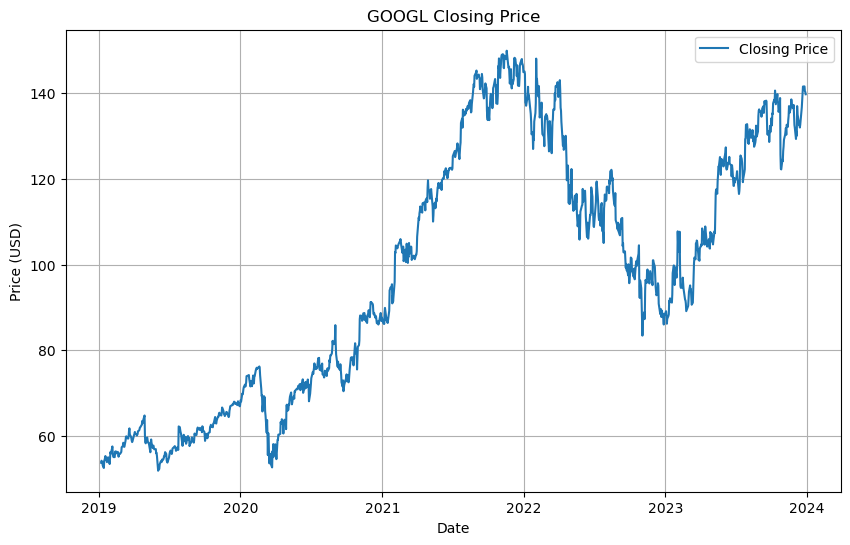

In [66]:
# Plot the closing price
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Closing Price')
plt.title('GOOGL Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


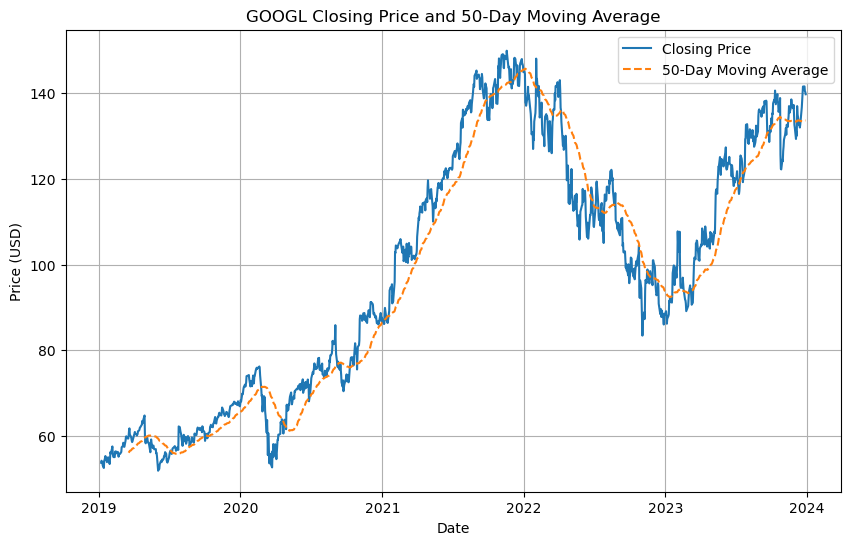

In [67]:
# Calculate the 50-day moving average
data['50_MA'] = data['Close'].rolling(window=50).mean() # this here calculates the 50 day rolling window.
# Its also why it has that lag

# Plot the closing price and the 50-day moving average
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['50_MA'], label='50-Day Moving Average', linestyle='--')
plt.title('GOOGL Closing Price and 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()




Mean daily return: 0.0009612486129752414
Standard deviation of daily return: 0.019995393185678886


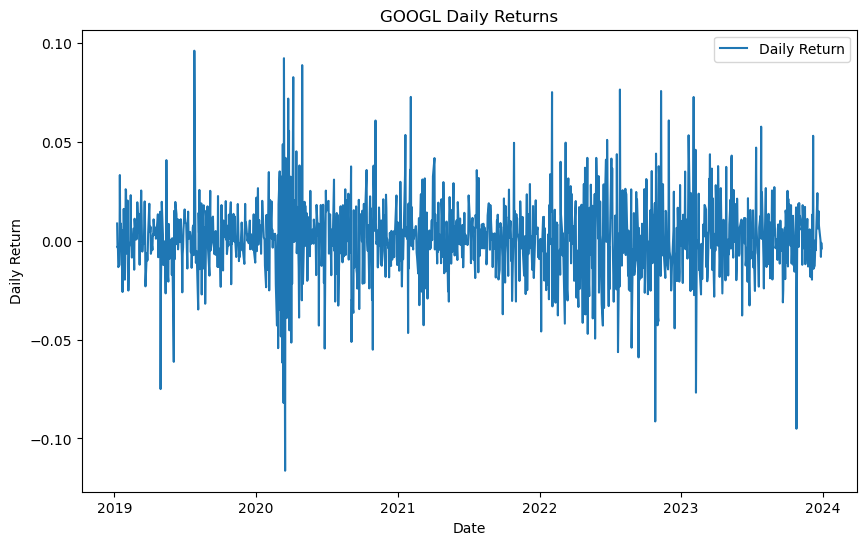

In [68]:
# Now lets plot daily returns

# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Calculate basic statistics
mean_return = data['Daily_Return'].mean()
std_return = data['Daily_Return'].std()

print(f"Mean daily return: {mean_return}")
print(f"Standard deviation of daily return: {std_return}")



# Plot the daily returns
plt.figure(figsize=(10, 6))
plt.plot(data['Daily_Return'], label='Daily Return')
plt.title('GOOGL Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


In [69]:
# Defining the Black-Scholes Equation

def black_scholes_call(S, K, T, r, sigma):
    """
    S is the strike Price
    r is the risk free interest rate
    sigma is the stock volatility
    T time to maturity in years
    K is the strike price of the option

    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    call_price = (S * stats.norm.cdf(d1, 0.0, 1.0) - 
                  K * np.exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    
    return call_price


In [77]:
# Gathering the data
S0 = data['Close'].iloc[-1]

# Define the option parameters
K = 2800  # Strike price
T = 1  # Time to maturity in years
r = 0.05  # Risk-free rate



sigma = std_return * np.sqrt(252)

call_price = black_scholes_call(S0, K, T, r, sigma)

print("call_price", call_price)

call_price 1.5934912785414005e-19
